In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [89]:
cardata = pd.read_csv("car_evaluation.csv",header=None)

We have taken reference of same data set.. and built a Random classifier and have improved overall accuracy

In [90]:
print(cardata.head())
cardata.shape

       0      1  2  3      4     5      6
0  vhigh  vhigh  2  2  small   low  unacc
1  vhigh  vhigh  2  2  small   med  unacc
2  vhigh  vhigh  2  2  small  high  unacc
3  vhigh  vhigh  2  2    med   low  unacc
4  vhigh  vhigh  2  2    med   med  unacc


(1728, 7)

we see that column names are empty so from the source of Data set we came to know about the columns. Hence assigning Column names.

Also, we are checking for Null values in data set.

In [91]:
columnames = ["buying_price","maintenance_cost","number_of_doors","number_of_persons","lug_boot","safety","decision"]
cardata.columns = columnames
cardata.head()
for column in columnames:
    print(cardata[column].value_counts())
    
cardata.isna().sum()

vhigh    432
high     432
med      432
low      432
Name: buying_price, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maintenance_cost, dtype: int64
2        432
3        432
4        432
5more    432
Name: number_of_doors, dtype: int64
2       576
4       576
more    576
Name: number_of_persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: decision, dtype: int64


buying_price         0
maintenance_cost     0
number_of_doors      0
number_of_persons    0
lug_boot             0
safety               0
decision             0
dtype: int64

The inference is that there are no Null values for any features in Data set. Now, we are in a state to predict our Target variable "Decision". hence removing it and assigning it to the target variable.

In [92]:
X= cardata.drop(["decision"],axis =1)
y= cardata["decision"]
X.head()

y.head()

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)


we see that column names are empty so from the source of Data set we came to know about the columns. Hence assigning Column names.

Also, we are checking for Null values in data set.

In [93]:
X_train.shape
print(X_test.shape)
y_train.shape
X_train.dtypes

(571, 6)


buying_price         object
maintenance_cost     object
number_of_doors      object
number_of_persons    object
lug_boot             object
safety               object
dtype: object

So we see that all the variables are categorical & hence we are doing Enconding for all the categorical variable

In [94]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols = ["buying_price","maintenance_cost","number_of_doors","number_of_persons","lug_boot","safety"])
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)
X_train.head()


C:\Users\sivap\anaconda3\envs\tf-gpu\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  elif pd.api.types.is_categorical(cols):
C:\Users\sivap\anaconda3\envs\tf-gpu\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  elif pd.api.types.is_categorical(cols):


,buying_price,maintenance_cost,number_of_doors,number_of_persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [95]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42,n_jobs=-1,max_depth=5,n_estimators=100,oob_score=True)


With "gini" Index as attribute selection measure we are predicting the Decision tree classifier

In [96]:
classifier_rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [97]:
classifier_rf.oob_score_


0.8660328435609335

In [98]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5],
    'min_samples_leaf': [5,10],
    'n_estimators': [10,25]
}

In [99]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf,param_grid=params,cv=4,n_jobs=-1,verbose=1,scoring="accuracy")

In [100]:
grid_search.fit(X_train, y_train)
grid_search.best_score_


Fitting 4 folds for each of 12 candidates, totalling 48 fits


0.8608489440400907

In [101]:
rf_best = grid_search.best_estimator_
rf_best
y_pred_forest = rf_best.predict(X_test)
from sklearn.metrics import accuracy_score

print("Model accuracy score with criterion entropy index: {0:0.4f}".format(accuracy_score(y_test,y_pred_forest)))


Model accuracy score with criterion entropy index: 0.8581


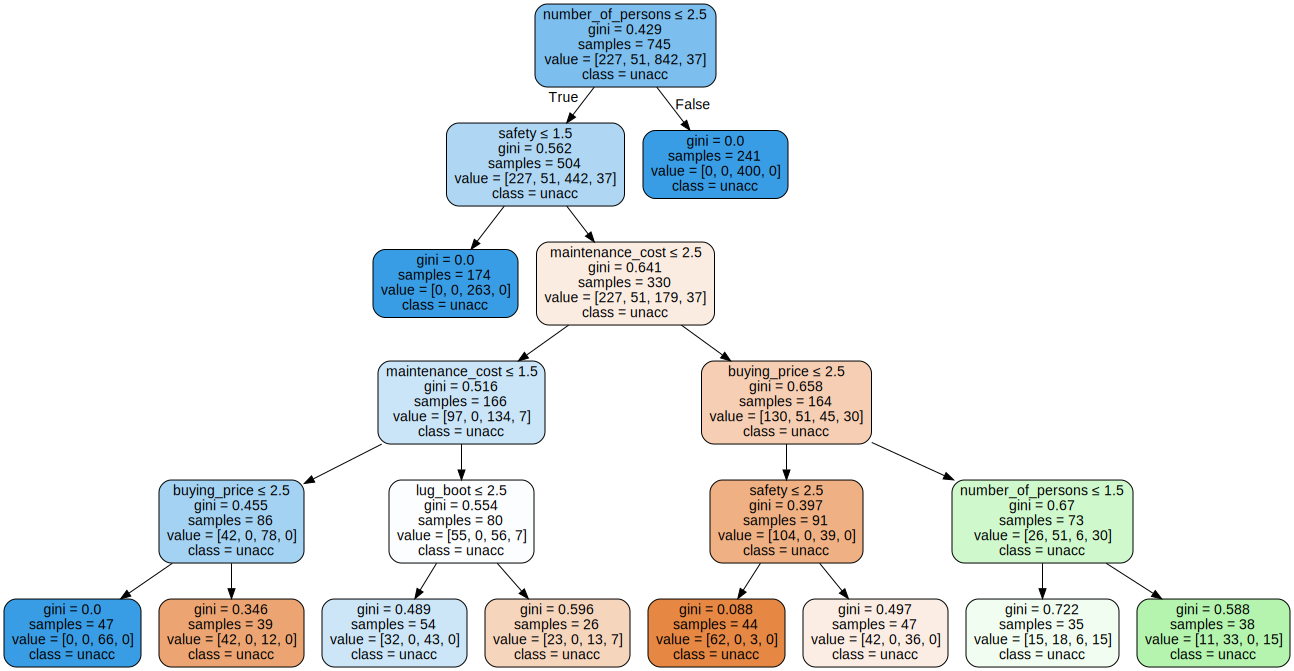

In [102]:
import graphviz
data = tree.export_graphviz(rf_best.estimators_[5],feature_names=X_train.columns,class_names=y_train,filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(data)
graph

In [103]:
y_pred_forest = rf_best.predict(X_test)

In [104]:
from sklearn.metrics import accuracy_score

print("Model accuracy score in Random forest with criterion entropy index: {0:0.4f}".format(accuracy_score(y_test,y_pred_forest)))


Model accuracy score in Random forest with criterion entropy index: 0.8581


In [105]:
print("Training set Random Forest score {:.4f}".format(rf_best.score(X_train,y_train)))
print("Test set Random Forest score {:.4f}".format(rf_best.score(X_test,y_test)))

Training set Random Forest score 0.8600
Test set Random Forest score 0.8581


In [106]:
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_test,y_pred_forest)
from sklearn.utils.multiclass import unique_labels

def plotconfusionbetter(y_true,y_pred):
    labels = unique_labels(y_test)
    column = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true,y_pred),columns=column,index=index)
    return table
    
print("Confusion Matrix\n",cm)
plotconfusionbetter(y_test,y_pred_forest)

Confusion Matrix
 [[113   0  16   0]
 [ 20   0   0   0]
 [ 20   0 377   0]
 [ 25   0   0   0]]


,Predicted acc,Predicted good,Predicted unacc,Predicted vgood
Actual acc,113,0,16,0
Actual good,20,0,0,0
Actual unacc,20,0,377,0
Actual vgood,25,0,0,0


In [107]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

         acc       0.63      0.88      0.74       129
        good       0.00      0.00      0.00        20
       unacc       0.96      0.95      0.95       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.86       571
   macro avg       0.40      0.46      0.42       571
weighted avg       0.81      0.86      0.83       571



C:\Users\sivap\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sivap\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sivap\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


On the whole, we have built a Random forest tree model classifier with 

Gini index -- we get training set accuracy as "0.8600" while the test accuracy as "0.8581" which is more or less similar
also we see good split we can interpret this from Classification report and confusion matrix
From confusion matrix we see that acc and unacc gives good performance 
we have seen significant improvement in precision, recall, f1-score comparing to Decision tree.
